# Practising Machine Learning workflow with Kaggle's Titanic Competition. 
https://www.kaggle.com/competitions/titanic

### Data dictionary 
Got the dictionary from Kaggle, for better understanding our data. 

- survival	Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	Sex	
- Age	Age in years	
- sibsp	# of siblings / spouses aboard the Titanic	
- parch	# of parents / children aboard the Titanic	
- ticket	Ticket number	
- fare	Passenger fare	
- cabin	Cabin number	
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [101]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### Load in the data

In [6]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
gender_submission = pd.read_csv('./gender_submission.csv')

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [13]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Visualize Survived from train data

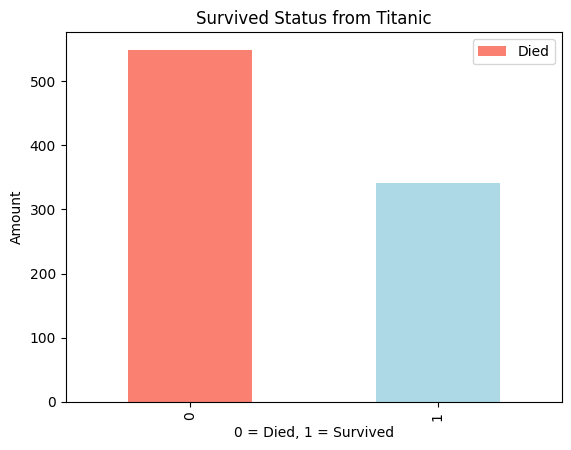

In [31]:
train_data.Survived.value_counts().plot(kind='bar',color=['salmon', 'lightblue']);
plt.xlabel('0 = Died, 1 = Survived')
plt.ylabel('Amount')
plt.title('Survived Status from Titanic')
plt.legend(['Died']);

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
# Check to see if there's missing data 
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Explore pattern

According to the history, female and children get on the life boat. What's the survive rate of female? 

In [32]:
train_data.Sex.value_counts

<bound method IndexOpsMixin.value_counts of 0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object>

In [33]:
women = train_data[train_data.Sex =='female']['Survived']
women_survived_rate = sum(women)/len(women)
print(f'The survived rate of women is {women_survived_rate}% on Titanic')

The survived rate of women is 0.7420382165605095% on Titanic


In [34]:
men = train_data[train_data.Sex == 'male']['Survived']
men_survived_rate = sum(men)/ len(men)
print(f'The survived rate of men is {men_survived_rate}% on Titanic')

The survived rate of men is 0.18890814558058924% on Titanic


In [36]:
pd.crosstab(train_data.Sex, train_data.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


Visualize from graph

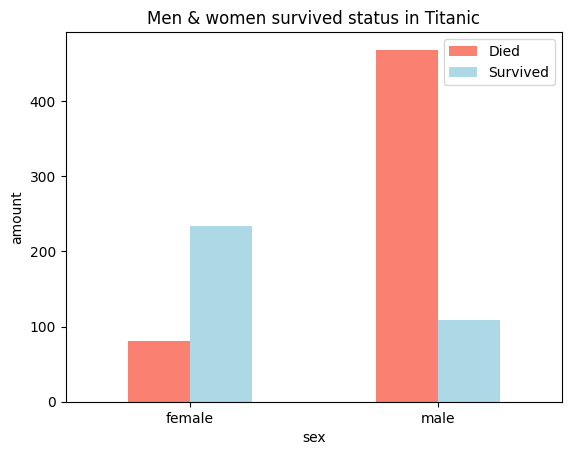

In [41]:
pd.crosstab(train_data.Sex, train_data.Survived).plot(kind='bar', color=['salmon', 'lightblue'] )
plt.title('Men & women survived status in Titanic')
plt.xlabel('sex')
plt.ylabel('amount')
plt.legend(['Died', 'Survived'])
plt.xticks(rotation=0);

From our data, it seems like female has higher survival rate than man in Titanic

### Does first class people tend to survive? 

In [9]:
first_class = train_data[train_data.Pclass == 1]['Survived']
first_class_survived_rate = sum(first_class)/len(first_class)
print(f'The survived rate of first class passenger is {first_class_survived_rate}%')

The survived rate of first class passenger is 0.6296296296296297%


In [10]:
under_class = train_data[train_data.Pclass!=1]['Survived']
under_class_survived_rate = sum(under_class)/len(under_class)
print(f'The survived rate of under class passenger is {under_class_survived_rate}%')

The survived rate of under class passenger is 0.30518518518518517%


In [43]:
pd.crosstab(train_data.Pclass, train_data.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

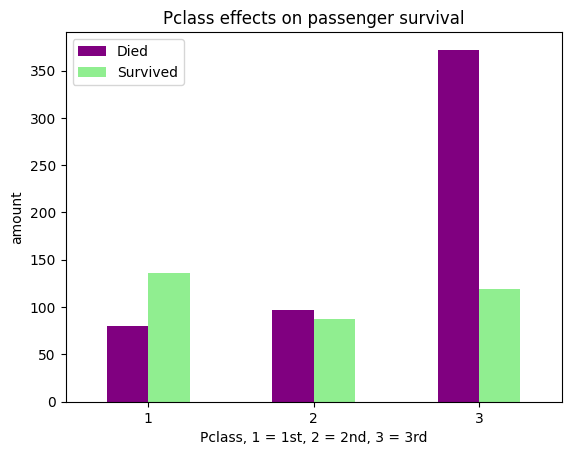

In [49]:
pd.crosstab(train_data.Pclass, train_data.Survived).plot.bar(color=['purple', 'lightgreen'])
plt.title('Pclass effects on passenger survival')
plt.xlabel('Pclass, 1 = 1st, 2 = 2nd, 3 = 3rd')
plt.ylabel('amount')
plt.legend(['Died', 'Survived'])
plt.xticks(rotation=0)

### Make a correlation matrix

In [70]:
train_data.corr()

C:\Users\lzhan\AppData\Local\Temp\ipykernel_35248\1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


C:\Users\lzhan\AppData\Local\Temp\ipykernel_35248\741194517.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_data.corr()


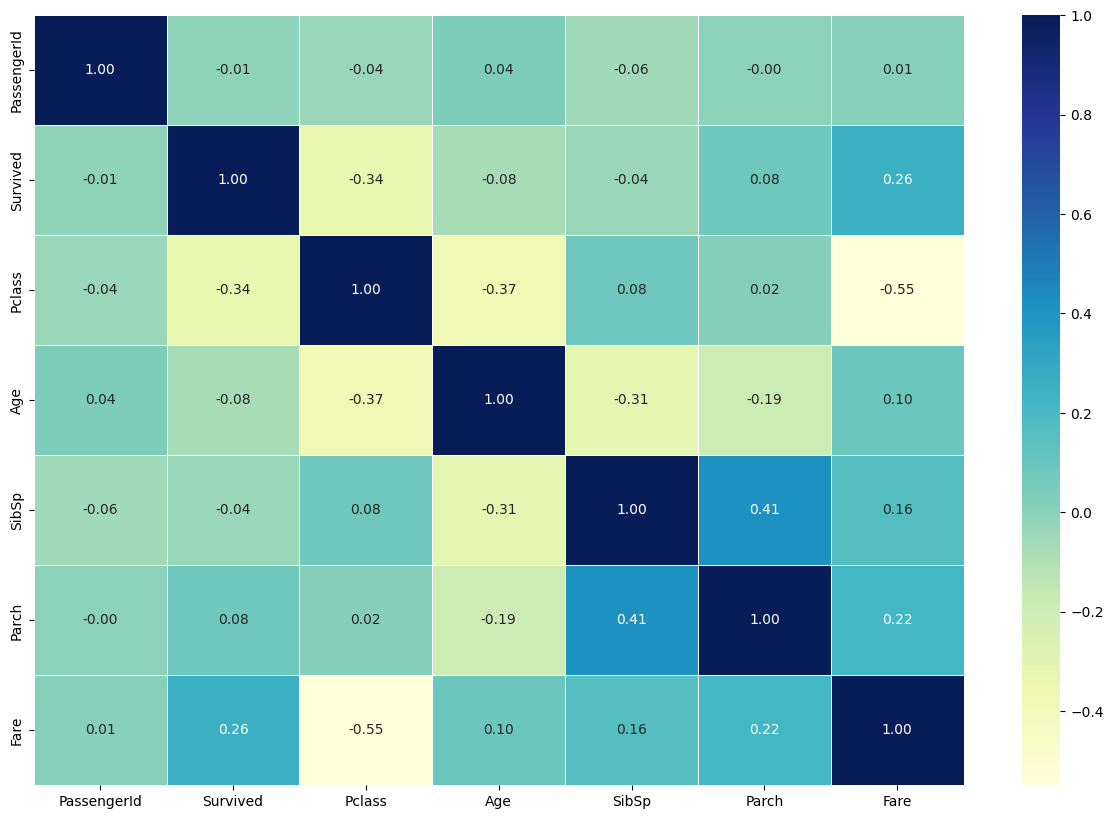

In [73]:
# Visualize the correlation matrix 
corr_matrix = train_data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot = True, 
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu');

Seems like `Fare` is has the most correlation to survived. 

### Preparing data

In [75]:
y = pd.DataFrame(train_data['Survived'])
# Clean up dataset and leave useful data for our model to train, Survived is for label
x = pd.DataFrame(train_data.drop(['Survived', 'Name', 'SibSp','Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1))
x.head()

,PassengerId,Pclass,Sex,Age,Fare
0,1,3,male,22.0,7.2500
1,2,1,female,38.0,71.2833
2,3,3,female,26.0,7.9250
3,4,1,female,35.0,53.1000
4,5,3,male,35.0,8.0500


In [77]:
# Continue clean up x 
x['Age'] = x['Age'].fillna(0).replace('.0', '').astype(int)
# replace sex with numbers, 1 = male and 0 = female
x['Sex'] = x['Sex'].replace('male', '1').replace('female', '0').astype(int)
# Round up fare and turn it into int
x['Fare'] = x['Fare'].round().astype(int)
x

,PassengerId,Pclass,Sex,Age,Fare
0,1,3,1,22,7
1,2,1,0,38,71
2,3,3,0,26,8
3,4,1,0,35,53
4,5,3,1,35,8
...,...,...,...,...,...
886,887,2,1,27,13
887,888,1,0,19,30
888,889,3,0,0,23
889,890,1,1,26,30


In [89]:
x_test = pd.DataFrame(test_data.drop(['Name', 'SibSp','Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1))
x_test['Age'] = x_test['Age'].fillna(0).replace('.0', '').astype(int)
# replace sex with numbers, 1 = male and 0 = female
x_test['Sex'] = x_test['Sex'].replace('male', '1').replace('female', '0').astype(int)
x_test['Fare'] = x_test['Fare'].fillna(0).round().astype(int)

x_test

,PassengerId,Pclass,Sex,Age,Fare
0,892,3,1,34,8
1,893,3,0,47,7
2,894,2,1,62,10
3,895,3,1,27,9
4,896,3,0,22,12
...,...,...,...,...,...
413,1305,3,1,0,8
414,1306,1,0,39,109
415,1307,3,1,38,7
416,1308,3,1,0,8


In [90]:
x_test.shape

(418, 5)

In [151]:
y_test = gender_submission
y_test

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [152]:
y_test = np.squeeze(y_test.drop('PassengerId',axis=1))
y_test

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [153]:
y_test.shape

(418,)

In [81]:
len(x), len(y)

(891, 891)

### Split data into training and val datasets

In [82]:
x_train, x_val, y_train, y_val = train_test_split(x,
                                                 y,
                                                 test_size=0.1,
                                                 random_state=512)

In [83]:
# Check the length
len(x_train), len(x_val), len(y_train), len(y_val)


(801, 90, 801, 90)

In [84]:
x_train[:10], x_train.shape

(     PassengerId  Pclass  Sex  Age  Fare
 786          787       3    0   18     7
 286          287       3    1   30    10
 352          353       3    1   15     7
 389          390       2    0   17    12
 637          638       2    1   31    26
 159          160       3    1    0    70
 759          760       1    0   33    86
 546          547       2    0   19    26
 663          664       3    1   36     7
 690          691       1    1   31    57,
 (801, 5))

In [156]:
y_train.shape

(801, 1)

### Build the model

Picking up model from https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Model experiment list: 
- SGD classifier
- KNN
- Logistic Regression

In [102]:
# Create a dictionary and put all model in it
models = {'SGD Classifier': SGDClassifier(),
          'KNN': KNeighborsClassifier(),
          'Logistic Regression': LogisticRegression()}

In [103]:
# Create a funtion to fit the model 
def fit_and_score(models, x_train, x_val, y_train, y_val):
    '''
    Fits and evaluates given model
    ''' 
    np.random.seed(512)
    model_scores={}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_val, y_val)
    return model_scores

In [104]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_val=x_val,
                            y_train=y_train,
                            y_val=y_val)
model_scores

C:\Users\lzhan\miniconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lzhan\miniconda3\envs\tf-gpu\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\lzhan\miniconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'SGD Classifier': 0.7,
 'KNN': 0.6666666666666666,
 'Logistic Regression': 0.8333333333333334}

### Model comparison

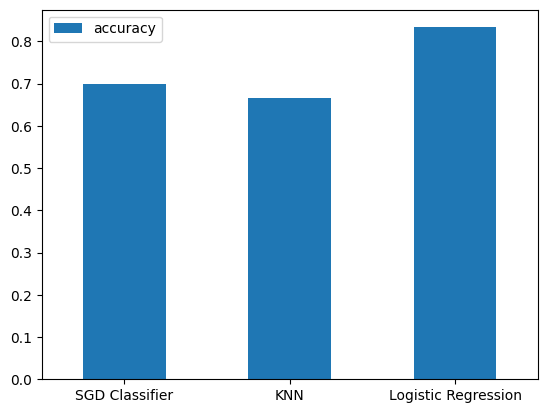

In [106]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot.bar()
plt.xticks(rotation=0);

### Hyperparameter tunning 

#### SGD Classifier

Trying to see if we can improve model performance, starting with SGD classifier

In [158]:
sgd_grid = {
    'alpha': [1e-9 ,1e-8, 1e-7,1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1,
              1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10], # learning rate
    'penalty': ['l2'],
    'n_jobs': [-1]
}

np.random.seed(512)
sgd_reg=GridSearchCV(SGDClassifier(),
                     param_grid=sgd_grid,
                     cv=5,
                     verbose=True)
# Fit random hyperparameter search model for LogisticRegression 
sgd_reg.fit(x_train, np.squeeze(y_train))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0,
                                   10000.0, 100000.0, 1000000.0, 10000000.0,
                                   100000000.0, 1000000000.0, 10000000000.0],
                         'n_jobs': [-1], 'penalty': ['l2']},
             verbose=True)

In [159]:
sgd_reg.best_params_

{'alpha': 10.0, 'n_jobs': -1, 'penalty': 'l2'}

In [160]:
sgd_reg.score(x_test, y_test)

0.3708133971291866

In [161]:
model_scores

{'SGD Classifier': 0.7,
 'KNN': 0.6666666666666666,
 'Logistic Regression': 0.8333333333333334}

#### KNN

In [163]:
train_scores=[]
test_scores=[]

# Create a list from different values for n_neighbours. 
neighbors = range(1, 21)
knn = KNeighborsClassifier()
# Loop through different n_neighbours 
for i in neighbors: 
    knn.set_params(n_neighbors = i)
    knn.fit(x_train, np.squeeze(y_train))
    train_scores.append(knn.score(x_train, np.squeeze(y_train)))
    test_scores.append(knn.score(x_test, y_test))

In [164]:
train_scores

[1.0,
 0.7827715355805244,
 0.7715355805243446,
 0.7503121098626716,
 0.7428214731585518,
 0.7240948813982522,
 0.7215980024968789,
 0.704119850187266,
 0.6916354556803995,
 0.6928838951310862,
 0.6941323345817728,
 0.6816479400749064,
 0.6803995006242197,
 0.682896379525593,
 0.6853932584269663,
 0.6891385767790262,
 0.6953807740324595,
 0.686641697877653,
 0.6928838951310862,
 0.6841448189762797]

In [165]:
test_scores

[0.631578947368421,
 0.631578947368421,
 0.6124401913875598,
 0.6507177033492823,
 0.6483253588516746,
 0.6578947368421053,
 0.65311004784689,
 0.6555023923444976,
 0.65311004784689,
 0.645933014354067,
 0.6435406698564593,
 0.6578947368421053,
 0.6555023923444976,
 0.65311004784689,
 0.65311004784689,
 0.6483253588516746,
 0.6483253588516746,
 0.6483253588516746,
 0.6483253588516746,
 0.6507177033492823]

Max KNN score on the test data: 65.79%


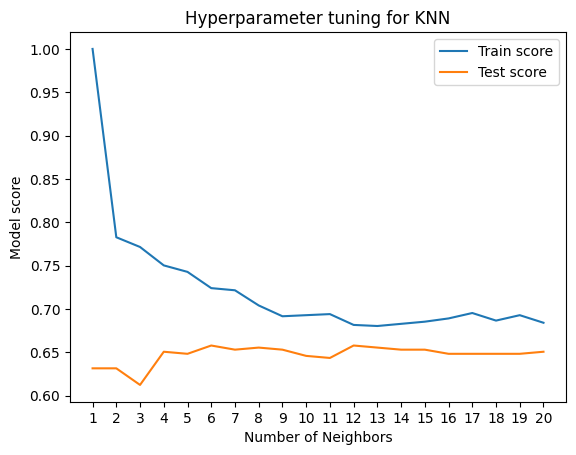

In [168]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.title('Hyperparameter tuning for KNN')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model score')
plt.legend();
print(f'Max KNN score on the test data: {max(test_scores) * 100:.2f}%')

In [167]:
model_scores

{'SGD Classifier': 0.7,
 'KNN': 0.6666666666666666,
 'Logistic Regression': 0.8333333333333334}

#### Logistic Regression

In [169]:
# Different hyperparameters for our Logistic Regression model 
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid, 
                         cv=5, 
                         verbose=True)

gs_log_reg.fit(x_train, np.squeeze(y_train))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [170]:
gs_log_reg.best_params_

{'C': 17.433288221999874, 'solver': 'liblinear'}

In [171]:
gs_log_reg.score(x_train, np.squeeze(y_train))

0.7740324594257179

In [172]:
model_scores

{'SGD Classifier': 0.7,
 'KNN': 0.6666666666666666,
 'Logistic Regression': 0.8333333333333334}

### Evaluating our tuned machine learning classifier

In [173]:
y_preds = gs_log_reg.predict(x_test)

In [174]:
y_preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [175]:
y_test

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

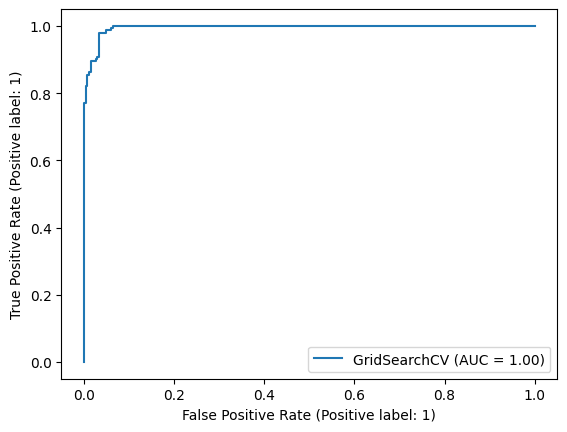

In [176]:
# Plot ROC curve and calculate and calculate AUC metric 
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)

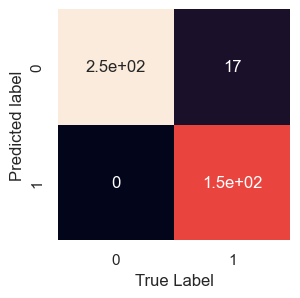

In [177]:
# Get a confusion matrix 
sns.set()

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted label')
    bottom, top = ax.get_ylim()
plot_conf_mat(y_test, y_preds)

In [178]:
# Get a classification report 
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       266
           1       0.90      1.00      0.95       152

    accuracy                           0.96       418
   macro avg       0.95      0.97      0.96       418
weighted avg       0.96      0.96      0.96       418



Seems like the Logistic Regression model did a great job! 

### Calculate evaluation metrics using cross-validation

In [179]:
# Check best hyperparameters 
gs_log_reg.best_params_

{'C': 17.433288221999874, 'solver': 'liblinear'}

In [191]:
# Create a new classifier with best parameters we found 
clf = LogisticRegression(C=17.433288221999874,
                        solver='liblinear')

In [192]:
# Cross-validated accuracy 
cv_acc = cross_val_score(clf, x, np.squeeze(y), cv=5, scoring='accuracy')
cv_acc

array([0.80446927, 0.79213483, 0.76966292, 0.73033708, 0.78651685])

In [193]:
cv_acc = np.mean(cv_acc)
cv_acc

0.7766241918272552

In [194]:
cv_precision = cross_val_score(clf, x, np.squeeze(y), cv=5, scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.7155193966633459

In [195]:
cv_recall = cross_val_score(clf, x, np.squeeze(y), cv=5, scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.6928815004262575

In [197]:
cv_f1 = cross_val_score(clf, x, np.squeeze(y), cv=5, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.7033946434409725

<Axes: title={'center': 'Cross-validated classification metrics'}>

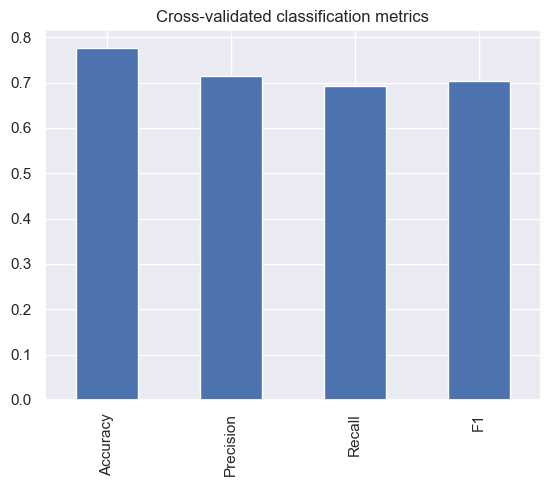

In [198]:
# Visualize cross-validated metrics 
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_precision,
                          'Recall': cv_recall,
                          'F1':cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title='Cross-validated classification metrics',
                     legend=False)

### Feature importance 

Which features contributed most to the outcomes of the model and how did they contribute?

In [200]:
clf = LogisticRegression(C=17.433288221999874,
                        solver='liblinear')
clf.fit(x_train, np.squeeze(y_train))

LogisticRegression(C=17.433288221999874, solver='liblinear')

In [201]:
clf.coef_

array([[ 2.21701705e-04, -1.02650709e+00, -2.52536033e+00,
        -1.67436804e-02,  1.57247739e-03]])

In [204]:
# match the coef features to columns 
feature_dict = dict(zip(x.columns, list(clf.coef_[0])))
feature_dict

{'PassengerId': 0.00022170170460589691,
 'Pclass': -1.0265070870913322,
 'Sex': -2.525360329213748,
 'Age': -0.01674368035968962,
 'Fare': 0.0015724773862208264}

<Axes: title={'center': 'Feature Importance'}>

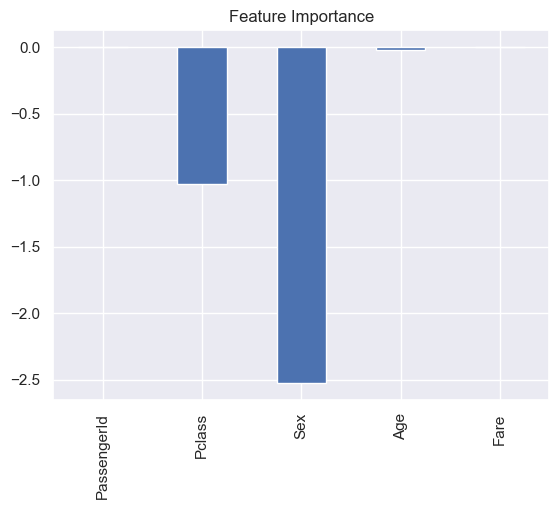

In [205]:
# visualize feature importance 
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False)

Seems like non of the data here are importance to weather they survived or not! LOL

### Trying a deep learning model and see how it works

In [206]:
import tensorflow as tf
from tensorflow.keras import layers

In [207]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [208]:
baseline_history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
26/26 [==============================] - 3s 11ms/step - loss: 9.4997 - accuracy: 0.5268 - val_loss: 3.3883 - val_accuracy: 0.6667
Epoch 2/10
26/26 [==============================] - 0s 4ms/step - loss: 4.8292 - accuracy: 0.5418 - val_loss: 3.9362 - val_accuracy: 0.6778
Epoch 3/10
26/26 [==============================] - 0s 6ms/step - loss: 4.7381 - accuracy: 0.5331 - val_loss: 1.4367 - val_accuracy: 0.7000
Epoch 4/10
26/26 [==============================] - 0s 4ms/step - loss: 2.9019 - accuracy: 0.5131 - val_loss: 0.9305 - val_accuracy: 0.6667
Epoch 5/10
26/26 [==============================] - 0s 5ms/step - loss: 2.5218 - accuracy: 0.5418 - val_loss: 0.8972 - val_accuracy: 0.6556
Epoch 6/10
26/26 [==============================] - 0s 5ms/step - loss: 2.6720 - accuracy: 0.5605 - val_loss: 0.6861 - val_accuracy: 0.6778
Epoch 7/10
26/26 [==============================] - 0s 5ms/step - loss: 1.8539 - accuracy: 0.5381 - val_loss: 0.8084 - val_accuracy: 0.3889
Epoch 8/10
26/26 [=

In [209]:
model.evaluate(x_val, y_val)

3/3 [==============================] - 0s 3ms/step - loss: 0.6641 - accuracy: 0.6889


[0.6640697717666626, 0.6888889074325562]

#### Model 2, adding more dense layer

In [212]:
model_2 = tf.keras.Sequential([
      layers.Dense(512, activation='relu'),
      layers.Dense(512, activation='relu'),
      layers.Dropout(.6),
      layers.Dense(256, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dropout(.6),
      layers.Dense(128, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dropout(.6),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(1, activation='sigmoid')
   ])

model_2.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model_2_history = model_2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
26/26 [==============================] - 1s 13ms/step - loss: 1.8977 - accuracy: 0.4794 - val_loss: 0.7097 - val_accuracy: 0.3889
Epoch 2/10
26/26 [==============================] - 0s 8ms/step - loss: 1.1179 - accuracy: 0.5293 - val_loss: 0.7123 - val_accuracy: 0.3333
Epoch 3/10
26/26 [==============================] - 0s 7ms/step - loss: 0.9161 - accuracy: 0.5506 - val_loss: 0.7442 - val_accuracy: 0.3333
Epoch 4/10
26/26 [==============================] - 0s 6ms/step - loss: 0.8023 - accuracy: 0.5543 - val_loss: 0.6937 - val_accuracy: 0.5222
Epoch 5/10
26/26 [==============================] - 0s 6ms/step - loss: 0.7931 - accuracy: 0.5206 - val_loss: 0.6720 - val_accuracy: 0.6889
Epoch 6/10
26/26 [==============================] - 0s 6ms/step - loss: 0.7328 - accuracy: 0.5243 - val_loss: 0.6780 - val_accuracy: 0.7111
Epoch 7/10
26/26 [==============================] - 0s 5ms/step - loss: 0.7315 - accuracy: 0.5581 - val_loss: 0.6494 - val_accuracy: 0.6889
Epoch 8/10
26/26 [=

In [213]:
model_2.evaluate(x_val, y_val)

3/3 [==============================] - 0s 7ms/step - loss: 0.6768 - accuracy: 0.6889


[0.6767829656600952, 0.6888889074325562]

It seems like our machine learning model works better in this case.